In [4]:
import numpy as np
from pathlib import Path

from planning_through_contact.geometry.collision_geometry.box_2d import Box2d
from planning_through_contact.geometry.planar.planar_pose import PlanarPose
from planning_through_contact.geometry.rigid_body import RigidBody
from planning_through_contact.planning.planar.planar_plan_config import (
    PlanarPlanConfig,
    PlanarSolverParams,
    SliderPusherSystemConfig,
)
from planning_through_contact.planning.planar.planar_pushing_planner import (
    PlanarPushingPlanner,
)

def get_slider_box() -> RigidBody:
    mass = 0.1
    box_geometry = Box2d(width=0.15, height=0.15)
    slider = RigidBody("box", box_geometry, mass)
    return slider

body = get_slider_box()

dynamics_config = SliderPusherSystemConfig(pusher_radius=0.015, slider=body)

config = PlanarPlanConfig(
    time_non_collision=4.0,
    time_in_contact=4.0,
    num_knot_points_contact=3,
    num_knot_points_non_collision=4,
    avoid_object=False,
    avoidance_cost="quadratic",
    no_cycles=False,
    dynamics_config=dynamics_config,
    allow_teleportation=True,
)

planner = PlanarPushingPlanner(config)

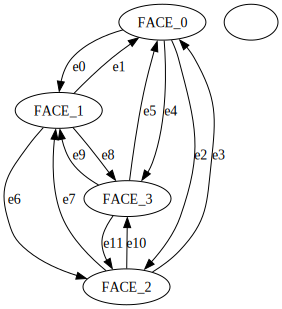

In [5]:
from IPython.display import SVG, display
display(SVG(planner.create_graph_diagram().create_svg()))

In [6]:
solver_params = PlanarSolverParams(
    print_path=True,
    print_flows=True,
    gcs_max_rounded_paths=0,
)

Test a few different trajectories and look at the flows:

In [ ]:
slider_initial_pose = PlanarPose(x=0.55, y=0.0, theta=np.pi / 2 - 0.2)
slider_target_pose = PlanarPose(x=0.70, y=0.0, theta=np.pi / 2 + 0.3)
finger_initial_pose = PlanarPose(x=-0.2, y=0.15, theta=0.0)
finger_target_pose = PlanarPose(x=-0.2, y=0.15, theta=0.0)

planner.set_initial_poses(finger_initial_pose, slider_initial_pose)
planner.set_target_poses(finger_target_pose, slider_target_pose)

result = planner._solve(solver_params)